### Import

In [761]:
import os
import sys
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import pickle
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.colors import LogNorm
from sklearn import mixture
from mpl_toolkits import mplot3d
from sknetwork.data import karate_club
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import louvain_communities
from skimage import io, color
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification, make_regression
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mnorm

### Fonts

In [762]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Parameters

In [763]:
no_samples = 1000
no_features = 2
no_informative = no_features
no_redundant = 0
no_repeated = 0
no_classes = 2
class_sep = 2.0
scale = 1.0
no_clusters_per_class = 1

### Regression Data

In [764]:
X, y, coef = make_regression(
    n_samples = no_samples,
    n_features = no_features, 
    n_informative = no_informative, 
    noise = 1.0,
    coef = True,
    random_state=25)
y[:,] = y[:,] / 100
y_index = y - np.min(y)
y_index = y_index / np.max(y_index)
cmap = np.zeros((no_samples,3))
cmap[:,0] = y_index

### Plot Regression Data

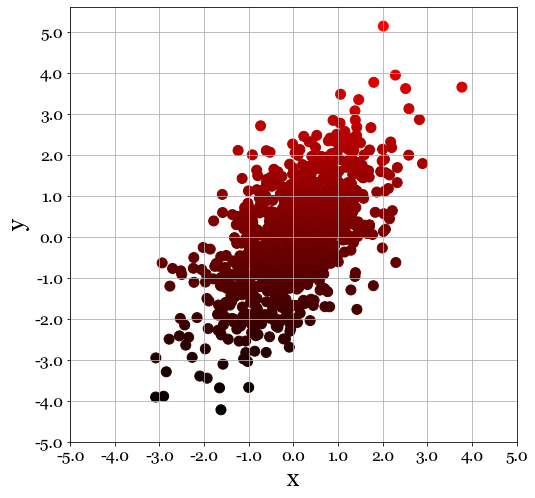

In [765]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],y,c=cmap,s=100)
plt.xticks(np.linspace(-5,5,11),labels=np.linspace(-5,5,11),fontsize=16,**csfont);
plt.yticks(np.linspace(-5,5,11),labels=np.linspace(-5,5,11),fontsize=16,**csfont);
plt.xlabel('x',fontsize=24,**csfont)
plt.ylabel('y',fontsize=24,**csfont)
plt.grid()
plt.savefig('../../assets/figures/008/algorithmic_objectives_regression.png',dpi=300,bbox_inches="tight")

### Classification Data

In [766]:
X, y = make_classification(
    n_samples = no_samples,
    n_features= no_features, 
    n_classes= no_classes,
    class_sep = class_sep,
    n_redundant= no_redundant, 
    n_informative= no_informative, 
    n_clusters_per_class = no_clusters_per_class,
    random_state=195)
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1]) 
X[:,1] = X[:,1]*1.5
c0 = np.where(y==0)[0]
c1 = np.where(y==1)[0]


### Plot Classification

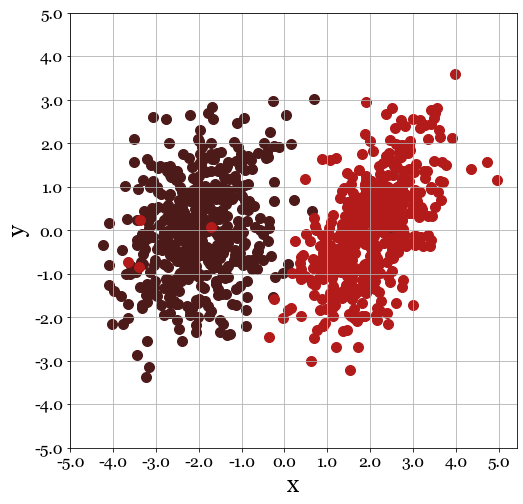

In [767]:
plt.figure(figsize=(8,8))
plt.scatter(X[c0,0],X[c0,1],color=(0.3,0.1,0.1),s=100)
plt.scatter(X[c1,0],X[c1,1],color=(0.7,0.1,0.1),s=100)
plt.xticks(np.linspace(-5,5,11),labels=np.linspace(-5,5,11),fontsize=16,**csfont);
plt.yticks(np.linspace(-5,5,11),labels=np.linspace(-5,5,11),fontsize=16,**csfont);
plt.xlabel('x',fontsize=24,**csfont)
plt.ylabel('y',fontsize=24,**csfont)
plt.grid()
plt.savefig('../../assets/figures/008/algorithmic_objectives_classification.png',dpi=300,bbox_inches="tight")

### Cluster Data

In [740]:
X, y, centers = make_blobs(
    n_samples = no_samples,
    n_features= no_features,
    centers = 4,
    cluster_std = 1.0,
    return_centers = True,
    random_state=20)
X[:,1] = X[:,1] - 3.5
X[:,0] = X[:,0] + 1.0
X[:,0] = X[:,0] * 0.6
c0 = np.where(y==0)[0]
c1 = np.where(y==1)[0]
c2 = np.where(y==2)[0]
c3 = np.where(y==3)[0]

### Plot Cluster Data

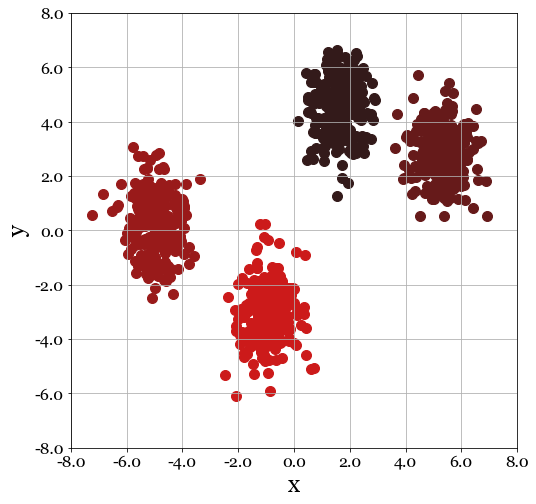

In [741]:
plt.figure(figsize=(8,8))
plt.scatter(X[c0,0],X[c0,1],color=(0.2,0.1,0.1),s=100)
plt.scatter(X[c1,0],X[c1,1],color=(0.4,0.1,0.1),s=100)
plt.scatter(X[c2,0],X[c2,1],color=(0.6,0.1,0.1),s=100)
plt.scatter(X[c3,0],X[c3,1],color=(0.8,0.1,0.1),s=100)
plt.xticks(np.linspace(-8,8,9),labels=np.linspace(-8,8,9),fontsize=16,**csfont);
plt.yticks(np.linspace(-8,8,9),labels=np.linspace(-8,8,9),fontsize=16,**csfont);
plt.xlabel('x',fontsize=24,**csfont)
plt.ylabel('y',fontsize=24,**csfont)
plt.grid()
plt.savefig('../../assets/figures/008/algorithmic_objectives_clustering.png',dpi=300,bbox_inches="tight")

### Create Colors for Dimensionality Reduction

In [742]:
LAB = np.zeros((360,3))
LAB[:,0] = 75
LAB[:,1] = np.sin(np.linspace(0,np.pi*2,361)[:-1]) * 30
LAB[:,2] = np.cos(np.linspace(0,np.pi*2,361)[:-1]) * 30
RGB = color.lab2rgb(LAB);

LABlowres = np.zeros((36,3))
LABlowres[:,0] = 75
LABlowres[:,1] = np.sin(np.linspace(0,np.pi*2,37)[:-1]) * 30
LABlowres[:,2] = np.cos(np.linspace(0,np.pi*2,37)[:-1]) * 30
RGBlowres = color.lab2rgb(LABlowres);

### Create Neurons with unique hue selectivity for Dimensionality Reduction

In [743]:
X = []
no_neurons = 50
shifts = []
values = np.linspace(0,np.pi*2,361)[:-1]
base_curve = np.sin(values)
base_curve[base_curve <= 0] = 0
base_curve = base_curve**2
for i in range(no_neurons):
    shift = np.random.randint(360)
    shifts.append(shift)
    curve = np.roll(base_curve,np.random.randint(360))
    X.append(curve)
X = np.array(X).T

### Plot Original Color selectivity and space

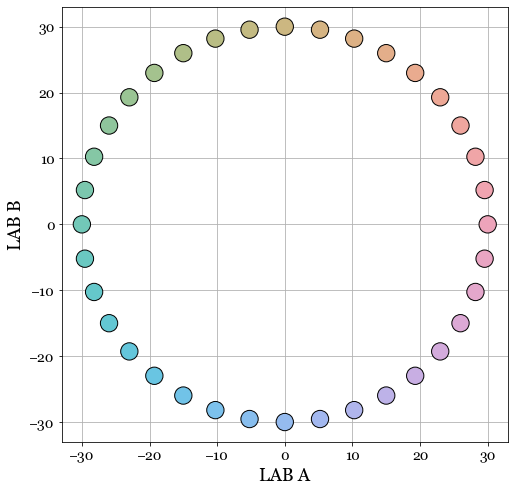

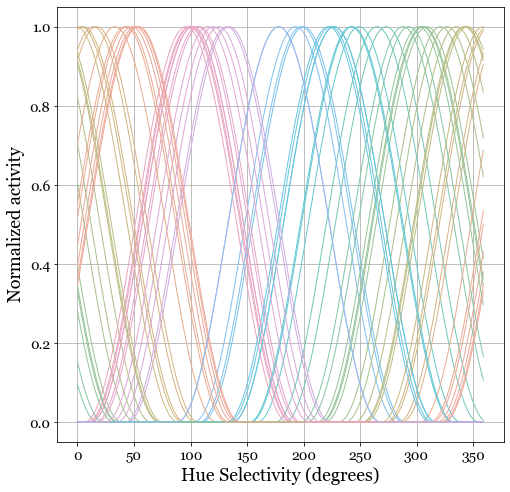

In [744]:
plt.figure(figsize=(8,8))
plt.scatter(LAB[::10,1],LAB[::10,2],color=RGB[::10,:],edgecolor='k',s=300,zorder=100)
plt.grid()
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('LAB A',fontsize=18,**csfont);
plt.ylabel('LAB B',fontsize=18,**csfont);
plt.savefig('../../assets/figures/008/dimensionality_0.png',dpi=300,bbox_inches="tight")

plt.figure(figsize=(8,8))
for i in range(no_neurons):
    curve = X[:,i]
    index = np.argmax(curve)
    plt.plot(curve,color=RGB[index,:],linewidth=1)
plt.grid()
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.ylabel('Normalized activity',fontsize=18,**csfont);
plt.xlabel('Hue Selectivity (degrees)',fontsize=18,**csfont);
plt.savefig('../../assets/figures/008/dimensionality_1.png',dpi=300,bbox_inches="tight")

### Run PCA on Color Data after subsetting and adding noise

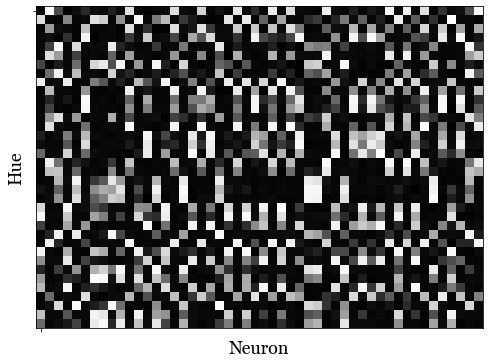

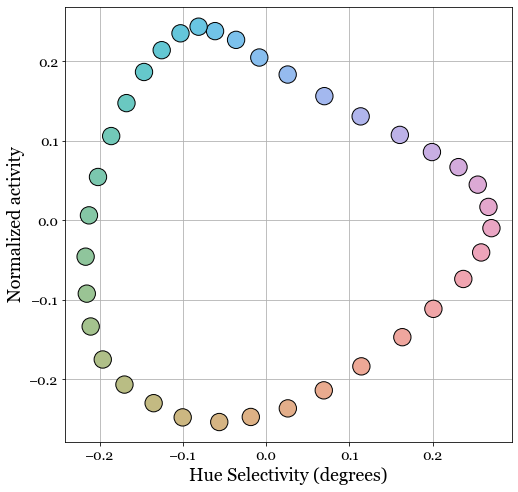

In [745]:
Xsub = X[::10,:]
RGBsub = RGB[::10,:]
rand_indices = np.random.permutation(Xsub.shape[0])
Xsub = Xsub[rand_indices,:]
RGBsub = RGBsub[rand_indices,:]
Noise = np.random.normal(0,0.01,Xsub.shape)
Xsub = Xsub + Noise
pca = PCA(n_components=2, svd_solver='arpack')
pca.fit_transform(Xsub.T)
C = pca.components_.T

plt.figure(figsize=(8,8))
plt.imshow(Xsub,cmap='gray')
plt.xticks(range(1),labels=[],fontsize=14,**csfont);
plt.yticks(range(1),labels=[],fontsize=14,**csfont);
plt.xlabel('Neuron',fontsize=18,**csfont);
plt.ylabel('Hue',fontsize=18,**csfont);
plt.savefig('../../assets/figures/008/dimensionality_2.png',dpi=300,bbox_inches="tight")

plt.figure(figsize=(8,8))
plt.scatter(C[:,0],C[:,1],c=RGBsub,edgecolor='k',s=300,zorder=100)
plt.grid()
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.ylabel('Normalized activity',fontsize=18,**csfont);
plt.xlabel('Hue Selectivity (degrees)',fontsize=18,**csfont);
plt.savefig('../../assets/figures/008/dimensionality_3.png',dpi=300,bbox_inches="tight")

### Manifolds

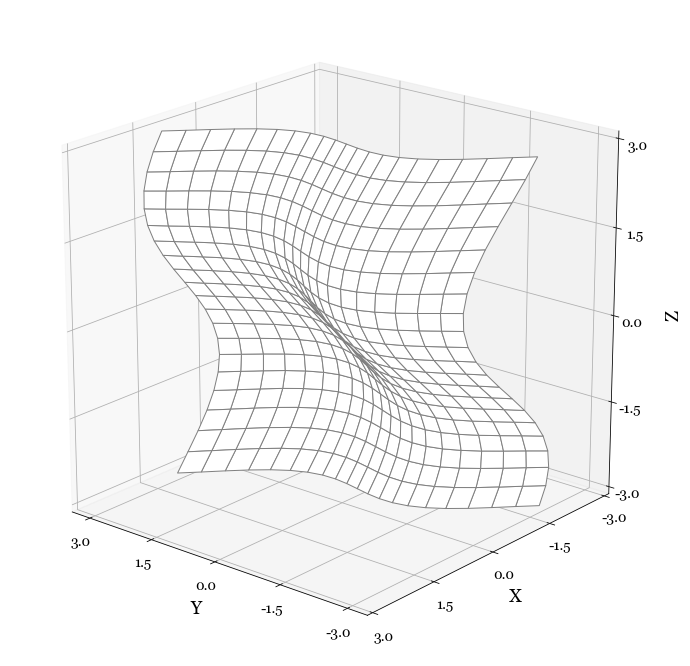

In [749]:
xval = np.linspace(-3,3,21)
yval = np.linspace(-3,3,21)
X,Y = np.meshgrid(xval,yval)
Z = 0.25*np.cos(Y) + np.sin(X*-1.2)*0.5 + X*0.2 + np.sin(Y-X*0.2)*1
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Z,Y,color='w',edgecolor='gray',shade=False)
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=20., azim=130)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_yticks(np.linspace(-3,3,5),labels=np.linspace(-3,3,5),fontsize=14,**csfont);
ax.set_xticks(np.linspace(-3,3,5),labels=np.linspace(-3,3,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(-3,3,5),labels=np.linspace(-3,3,5),fontsize=14,**csfont);
ax.set_ylabel('\nX',fontsize=18,**csfont)
ax.set_xlabel('\nY',fontsize=18,**csfont)
ax.set_zlabel('\n\nZ', rotation=90,fontsize=18,**csfont);
plt.savefig('../../assets/figures/008/manifold.png',dpi=300,bbox_inches="tight")

### Forecasting Detection

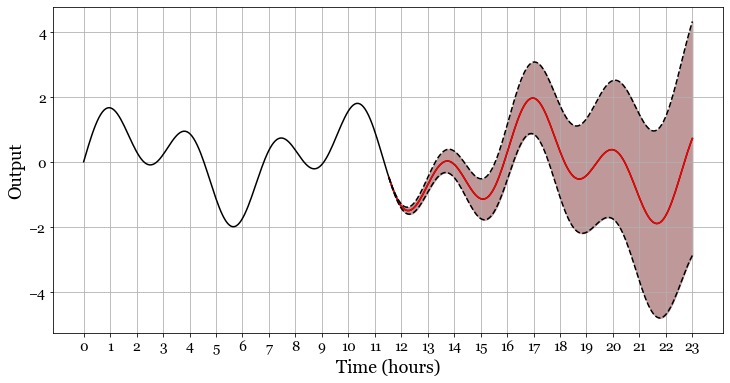

In [750]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)
phases = [0,1]
freqs = [3,7]
y = np.zeros((360))
for i in range(len(freqs)):
    f1 = freqs[i]
    p1 = phases[i]
    x1 = np.sin(np.linspace(0,p1 + (f1*2*np.pi),360,False))
    y = y + x1
    
xval = np.linspace(0,23,360)
ysample = y[-180:]
yup = y[-180:] + (np.linspace(1,1.1,180)**16) - 1
ydown = y[-180:] - (np.linspace(1,1.1,180)**16) + 1
xsample = xval[-180:]
plt.plot(xval,y,c='k')
plt.plot(xsample,ysample,c='r')
plt.plot(xsample,yup,'k--')
plt.plot(xsample,ydown,'k--')
ax.fill_between(xsample, ysample, yup,color=(0.75,0.6,0.6))
ax.fill_between(xsample, ysample, ydown,color=(0.75,0.6,0.6))
plt.grid()
plt.xticks(range(24),fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.ylabel('Output',fontsize=18,**csfont);
plt.xlabel('Time (hours)',fontsize=18,**csfont);
plt.savefig('../../assets/figures/008/forecasting.png',dpi=300,bbox_inches="tight")

### Anomaly Detection

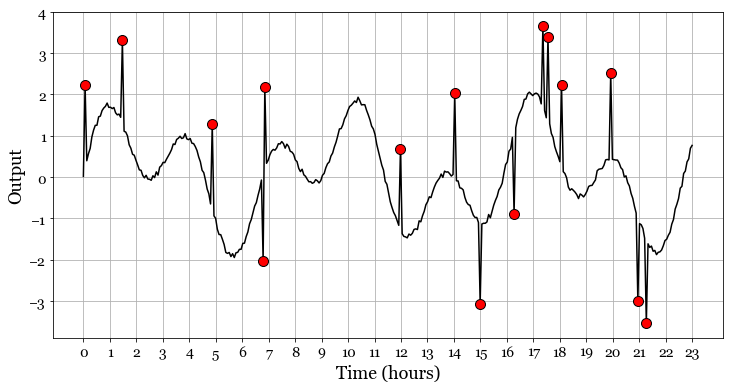

In [757]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)
phases = [0,1]
freqs = [3,7]
y = np.zeros((360))
n0 = np.random.random(len(y)) * 0.15
n1 = np.random.random(len(y)) * 0.52
n2 = (np.random.random(len(y)) - 0.5)
n2 = n2 / np.abs(n2)
n1[n1 > 0.5] = 2
n1[n1 < 2.0] = 0
n1s = np.where(n1 > 0)
n1 = n1 * n2
for i in range(len(freqs)):
    f1 = freqs[i]
    p1 = phases[i]
    x1 = np.sin(np.linspace(0,p1 + (f1*2*np.pi),360,False))
    y = y + x1
y = y + n1 + n0
xval = np.linspace(0,23,360)
plt.plot(xval,y,c='k')
plt.scatter(xval[n1s],y[n1s],color='r',edgecolor='k',s=100,zorder=1000)
plt.grid()
plt.xticks(range(24),fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.ylabel('Output',fontsize=18,**csfont);
plt.xlabel('Time (hours)',fontsize=18,**csfont);
plt.savefig('../../assets/figures/008/anomaly_detection.png',dpi=300,bbox_inches="tight")

### Link Prediction

In [758]:
data = karate_club(metadata=True)
A = data['adjacency'].toarray()*1.0
labels = data['labels']
X = data['position']
G = nx.from_numpy_matrix(A)
edges = np.array(list(G.edges))
ccpa_preds = []
ccpa = nx.common_neighbor_centrality(G)
strengths = []
for u, v, p in ccpa: 
    strengths.append(p)
    ccpa_preds.append((u,v,p))
strengths = np.array(strengths)
strengths = strengths - np.min(strengths)

### Plot Link Prediction

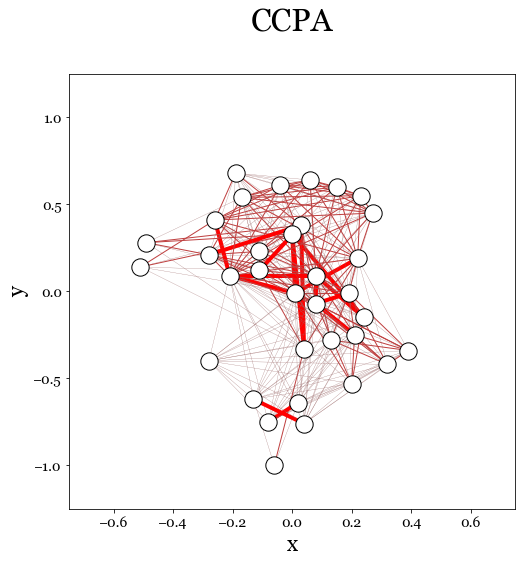

In [759]:
plt.figure(figsize=(8,8));
plt.scatter(X[:,0],X[:,1],color='w',edgecolor='k',s=300,zorder=1000);
for i,item in enumerate(ccpa_preds):
    u,v,strength = item
    strength = strengths[i]
    node1 = X[u,:]
    node2 = X[v,:]
    if (strength <= 3 and strength > 2):
        plt.plot([node1[0],node2[0]],[node1[1],node2[1]],linewidth=0.25,c=(0.6,0.4,0.4))
    if (strength <= 4 and strength > 3):
        plt.plot([node1[0],node2[0]],[node1[1],node2[1]],linewidth=1,c=(0.75,0.25,0.25))
    if (strength > 4):
        plt.plot([node1[0],node2[0]],[node1[1],node2[1]],linewidth=4,c=(1,0,0))
plt.axis((-0.75,0.75,-1.25,1.25))
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.title('CCPA\n',fontsize=32,**csfont);
plt.savefig('../../assets/figures/008/link_prediction.png',dpi=300,bbox_inches="tight")